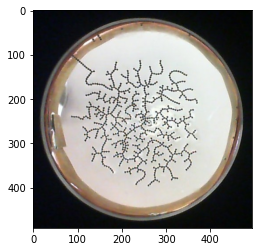

In [1]:
import imageio.v3 as imageio
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage as snd
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu
from skimage.morphology import skeletonize

original = imageio.imread('./hw3_img/sample.jpg')
plt.imshow(original)

Debido a que la transformación *hit or miss* requiere de una imagen binaria convertimos la imagen RGB en una imagen de escala de grises 
y luego seleccionamos un umbral $t$ y binarizamos la imagen de acuerdo al umbral: $f(x,y) \geq t \implies f'(x,y) = 0 \land f(x,y) < t \implies f'(x,y) = 1$. 

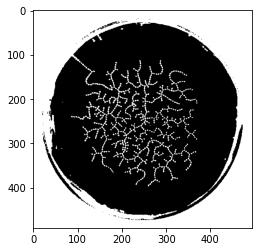

In [2]:
gray = rgb2gray(original)
thresh = threshold_otsu(gray)
binary = gray < thresh
plt.imshow(binary, cmap='gray')

Luego convertimos la imagen en una versión simplificada utilizando *thinning*.

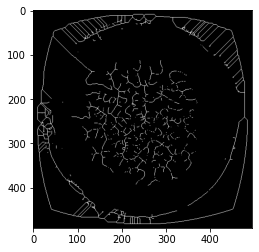

In [3]:
binary = skeletonize(binary)
plt.imshow(binary, cmap='gray')

A continuación definimos las estructuras binarias correspondientes a un *hit*, en este caso son los patrones de las posibles bifurcaciones, definimos 3 patrones básicos y luego generamos sus posibles rotaciones para generar todos los patrones. Luego definimos la estructura *miss*.

In [4]:
h1 = [
[0,0,1], 
[1,1,0], 
[0,1,0]
]
h2 = [
[1,0,1], 
[0,1,0], 
[0,1,0]
]
h3 = [
[0,0,0], 
[1,1,1], 
[0,1,0]]


hitlist = []
for i in range(4):
    hitlist.append(np.rot90(h1, i))
    hitlist.append(np.rot90(h2, i))
    hitlist.append(np.rot90(h3, i))


m = [[0,0,0],[0,0,0],[0,0,0]]
misslist = [ m for i in range(12)]

Luego por cada patrón de bifurcación realizamos una transformación, combinando los resultados para todos los patrones obtenemos
los puntos de bifurcación.

In [5]:
branches = np.zeros_like(binary)
for hit, miss in zip(hitlist, misslist):
    branches += snd.binary_hit_or_miss(binary, hit, miss)

Finalmente modificamos la imagen original, susituyendo los píxeles originales los cuales fueron *hit* por un píxel rojo para resaltar la bifurcación.

In [9]:
branched_image = original.copy()
for x in range(len(branches)):
    for y in range(len(branches[x])):
        if branches[x][y] > 0:
            branched_image[x][y] = (255,0,0)
            branched_image[x+1][y] = (255,0,0)
            branched_image[x-1][y] = (255,0,0)
            branched_image[x][y+1] = (255,0,0)
            branched_image[x][y-1] = (255,0,0)
            

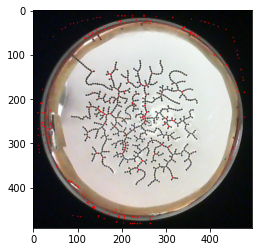

In [10]:
plt.imshow(branched_image)

Ampliando la imagen final podemos apreciar que pudimos determinar algunos de los puntos de bifurcación en la imagen original.

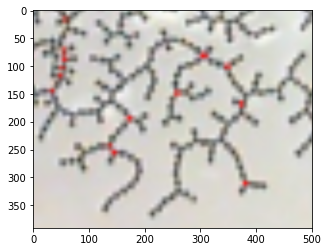

In [11]:
result = imageio.imread('./hw3_img/result.png')
plt.imshow(result)